<a href="https://colab.research.google.com/github/dagisky/ML_Porjects/blob/master/Covid19GoogleDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1lqGTBPWQW-1w1O36ZZrpcwtBE0bMJ9s8'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Global_Mobility_Report.csv') 

In [0]:
#2.1 Get the file2
downloaded2 = drive.CreateFile({'id':'14tvuDQqbA8MCHtRgZPOpxku_Z6Kyb5V0'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('us_states_covid19_daily.csv') 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from datetime import date, timedelta
# from us_states import states
%matplotlib inline

covid19_df = pd.read_csv('us_states_covid19_daily.csv') # https://www.kaggle.com/sudalairajkumar/covid19-in-usa
mobility_df = pd.read_csv('Global_Mobility_Report.csv')

covid19_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200430,AK,355.0,18764.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN,252.0,78605f774dcba587c8b24512354a3830ef3b5e4f,2020-04-30T20:00:00Z,9.0,NaN,19119.0,19119.0,19119.0,2,0.0,0.0,0.0,0.0,0.0
1,20200430,AL,7019.0,80177.0,NaN,NaN,978.0,NaN,335.0,NaN,195.0,NaN,47546b95299bd673c18e27d5284d7ba75b362464,2020-04-30T20:00:00Z,269.0,978.0,87196.0,87196.0,87196.0,1,24.0,33.0,6570.0,177.0,6747.0
2,20200430,AR,3255.0,45124.0,NaN,95.0,402.0,NaN,NaN,23.0,85.0,1305.0,8f880ed4454e1fc3bbeff4b0655314f8878cbe22,2020-04-30T20:00:00Z,61.0,402.0,48379.0,48379.0,48379.0,5,2.0,13.0,2867.0,63.0,2930.0
3,20200430,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14c16072106c6d59a534dfcbd590ca14f42e4a7f,2020-04-30T20:00:00Z,0.0,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200430,AZ,7648.0,64138.0,NaN,755.0,1169.0,311.0,NaN,194.0,NaN,1499.0,eb3be7d08e6c0e46e5aa79eb92b2da29f2e6dc13,2020-04-30T20:00:00Z,320.0,1169.0,71786.0,71786.0,71786.0,4,16.0,38.0,2527.0,446.0,2973.0


In [0]:
covid19_total = covid19_df[['dateChecked','state','positive', 'negative','hospitalizedCurrently','hospitalizedCumulative', 'inIcuCurrently','inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative','recovered']]
covid19_df = covid19_df[['dateChecked','state', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease']]
# covid19_df = covid19_df[['dateChecked','state', 'positive', 'negative', 'recovered', 'death', 'totalTestResults', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease']]
mobility_df = mobility_df[mobility_df.country_region == 'United States']

In [0]:
covid19_df.head()

,dateChecked,state,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-30T20:00:00Z,AK,0.0,0.0,0.0,0.0,0.0
1,2020-04-30T20:00:00Z,AL,24.0,33.0,6570.0,177.0,6747.0
2,2020-04-30T20:00:00Z,AR,2.0,13.0,2867.0,63.0,2930.0
3,2020-04-30T20:00:00Z,AS,0.0,0.0,0.0,0.0,0.0
4,2020-04-30T20:00:00Z,AZ,16.0,38.0,2527.0,446.0,2973.0


In [0]:
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona', 'CA': 'California','CO': 'Colorado','CT': 'Connecticut',
        'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho', 'IL': 'Illinois',
        'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota',
        'MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota',
        'NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma',
        'OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
        'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}



def week_of_year2dater(year, week):
  d = date(year,1,1)
  dlt = timedelta(days = (week-1)*7)
  return d + dlt,  d + dlt + timedelta(days=6)


In [0]:
covid19_df = covid19_df.replace(states.keys(), states.values())
covid19_df['dateChecked'] = pd.to_datetime(covid19_df['dateChecked'])
mobility_df['date'] = pd.to_datetime(mobility_df["date"])
covid19_df = covid19_df.rename(columns={"dateChecked": "date"}, errors="raise")

In [0]:
covid19_df.head()

,date,state,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-30 20:00:00+00:00,Alaska,0.0,0.0,0.0,0.0,0.0
1,2020-04-30 20:00:00+00:00,Alabama,24.0,33.0,6570.0,177.0,6747.0
2,2020-04-30 20:00:00+00:00,Arkansas,2.0,13.0,2867.0,63.0,2930.0
3,2020-04-30 20:00:00+00:00,American Samoa,0.0,0.0,0.0,0.0,0.0
4,2020-04-30 20:00:00+00:00,Arizona,16.0,38.0,2527.0,446.0,2973.0


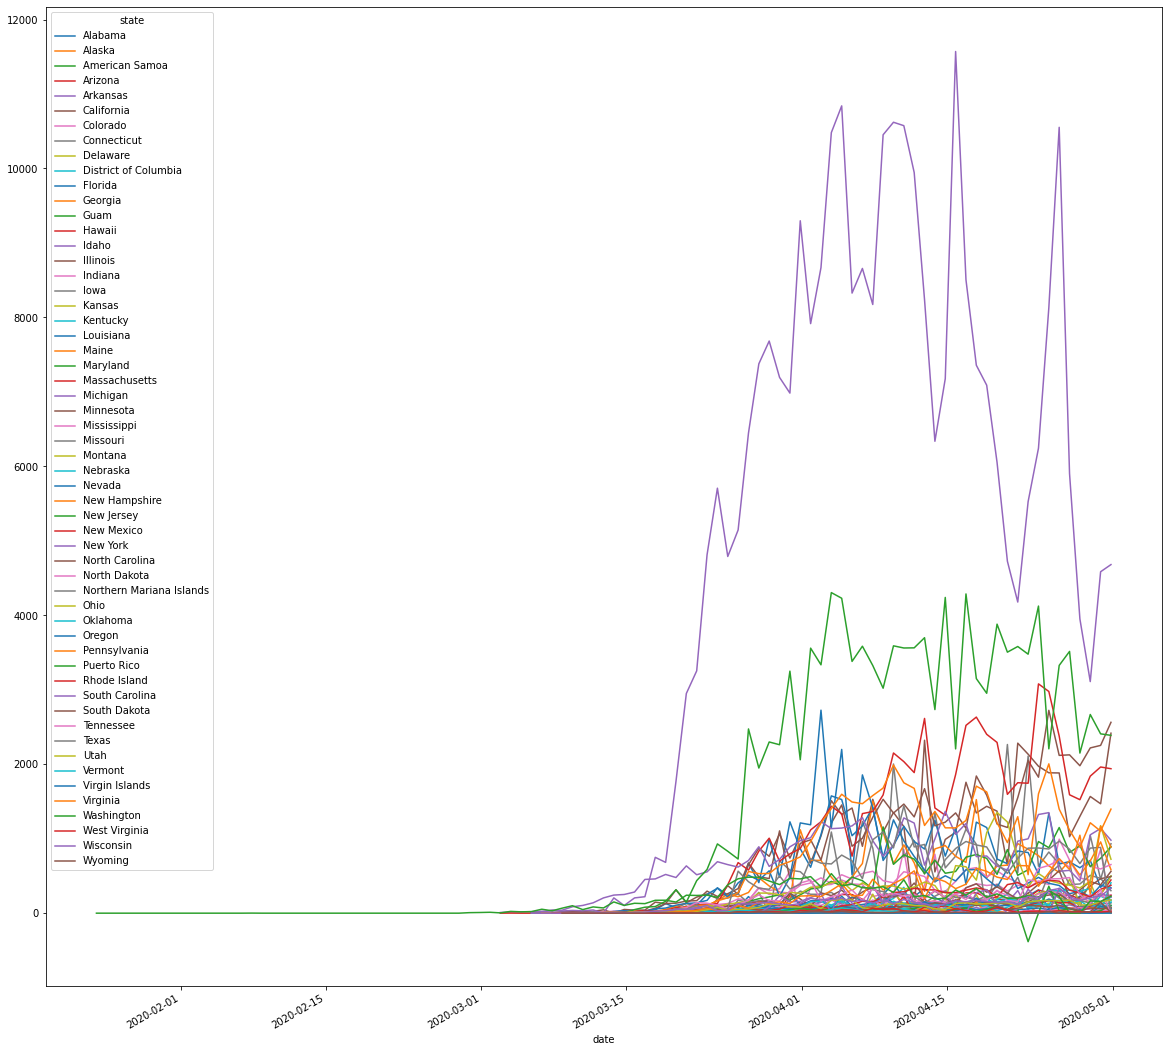

In [0]:
df = covid19_df.pivot(index='date', columns='state', values='positiveIncrease')
df.plot(figsize=(20,20))

In [0]:
covid19_week_data=covid19_df
covid19_week_data['date'] = pd.to_datetime(covid19_week_data['date'])
covid19_week_data['date'] = covid19_week_data['date'].dt.weekofyear
covid19_week_data = covid19_week_data.groupby(['state', 'date']).mean().reset_index()
covid19_week_data.head()

,state,date,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,Alabama,10,0.000000,0.0,0.000000,0.000000,0.000000
1,Alabama,11,0.000000,0.0,4.000000,1.714286,5.714286
2,Alabama,12,0.000000,0.0,205.142857,18.000000,223.142857
3,Alabama,13,0.571429,0.0,388.571429,95.428571,484.000000
4,Alabama,14,5.857143,33.0,1014.000000,141.428571,1155.428571


In [0]:
covid19_df.date.value_counts()

17    392
15    392
13    392
16    392
14    392
12    392
11    354
18    224
10    181
9       9
7       7
5       7
8       7
6       7
4       5
Name: date, dtype: int64

In [0]:
weeks=np.sort(covid19_week_data.date.unique())
states = covid19_week_data.state.unique()


In [0]:
weeks_str = list()
for w in weeks:
  s, e = week_of_year2dater(2020, int(w))
  weeks_str.append(str(s)+' - '+str(e))

In [0]:
covid19_week_data[covid19_week_data.state == 'Illinois']

,state,date,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
131,Illinois,10,0.000000,0.0,16.750000,0.500000,17.250000
132,Illinois,11,0.000000,0.0,36.857143,8.285714,45.142857
133,Illinois,12,1.285714,0.0,974.571429,140.714286,1115.285714
134,Illinois,13,8.000000,0.0,2270.714286,506.714286,2777.428571
135,Illinois,14,29.857143,0.0,3508.714286,951.428571,4460.142857
136,Illinois,15,63.714286,0.0,4593.714286,1370.857143,5964.571429
137,Illinois,16,81.428571,0.0,4725.428571,1357.857143,6083.285714
138,Illinois,17,91.857143,0.0,8298.285714,1935.142857,10233.428571
139,Illinois,18,105.500000,0.0,11475.000000,2253.750000,13728.750000


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the 

-----------------
['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia']
-----------------
['Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky']
-----------------
['Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska']
-----------------
['Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma']
-----------------
['Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont']


/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


IndexError: ignored

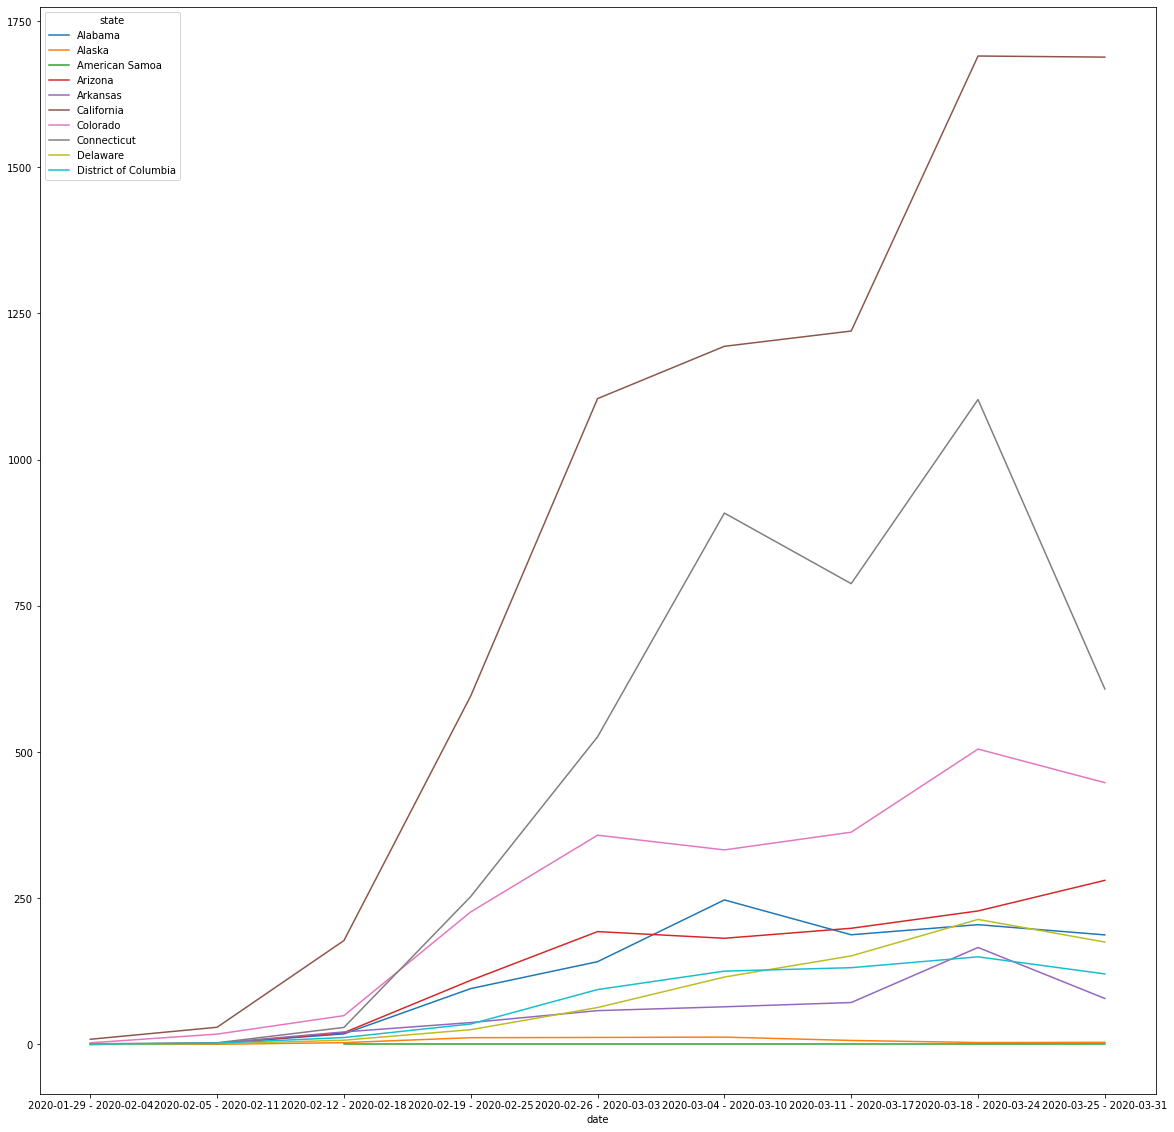

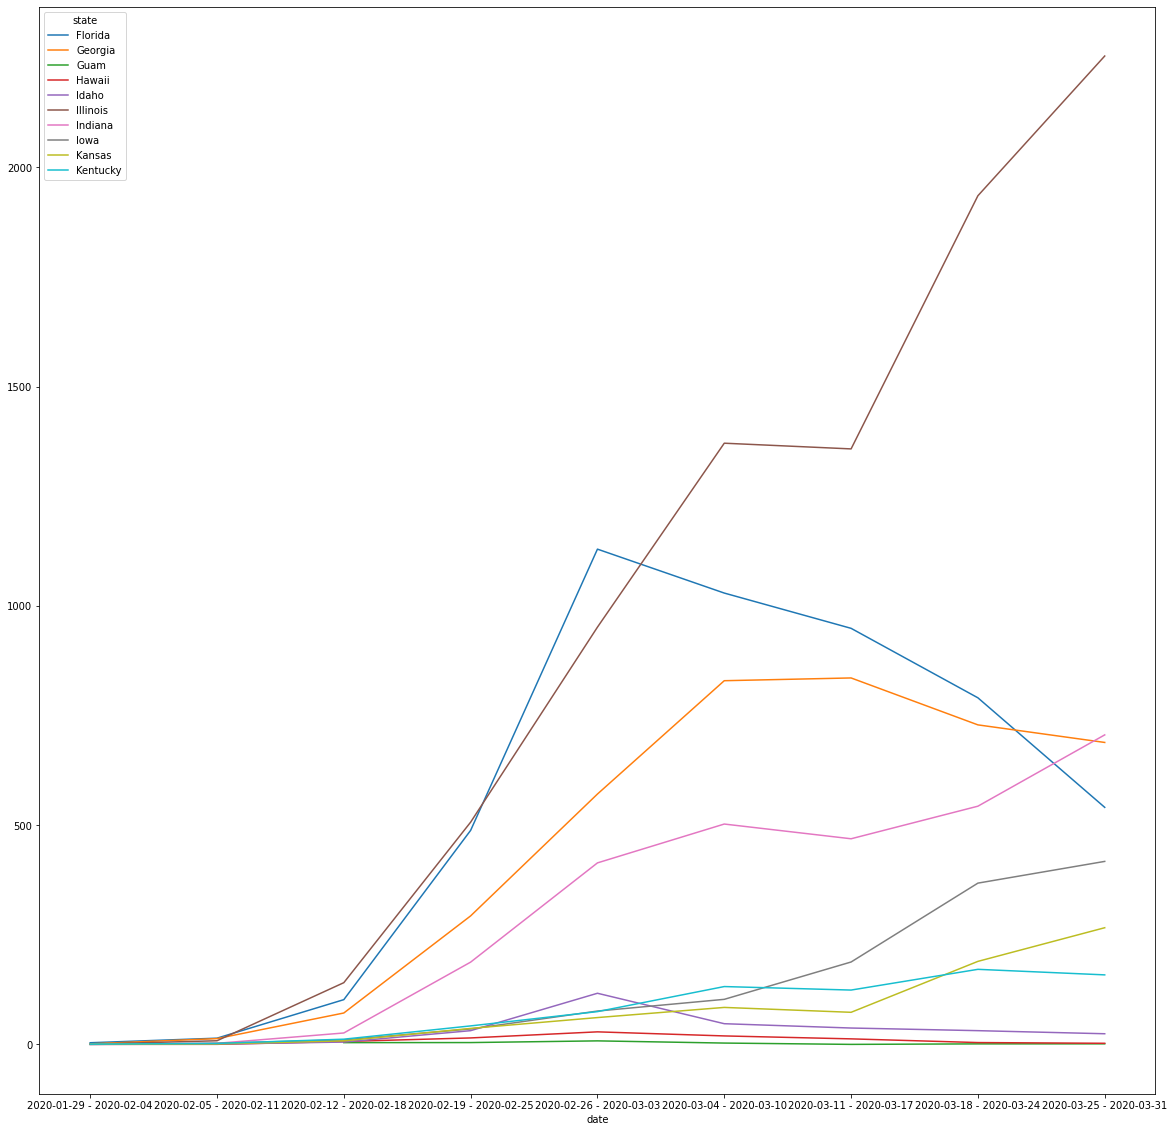

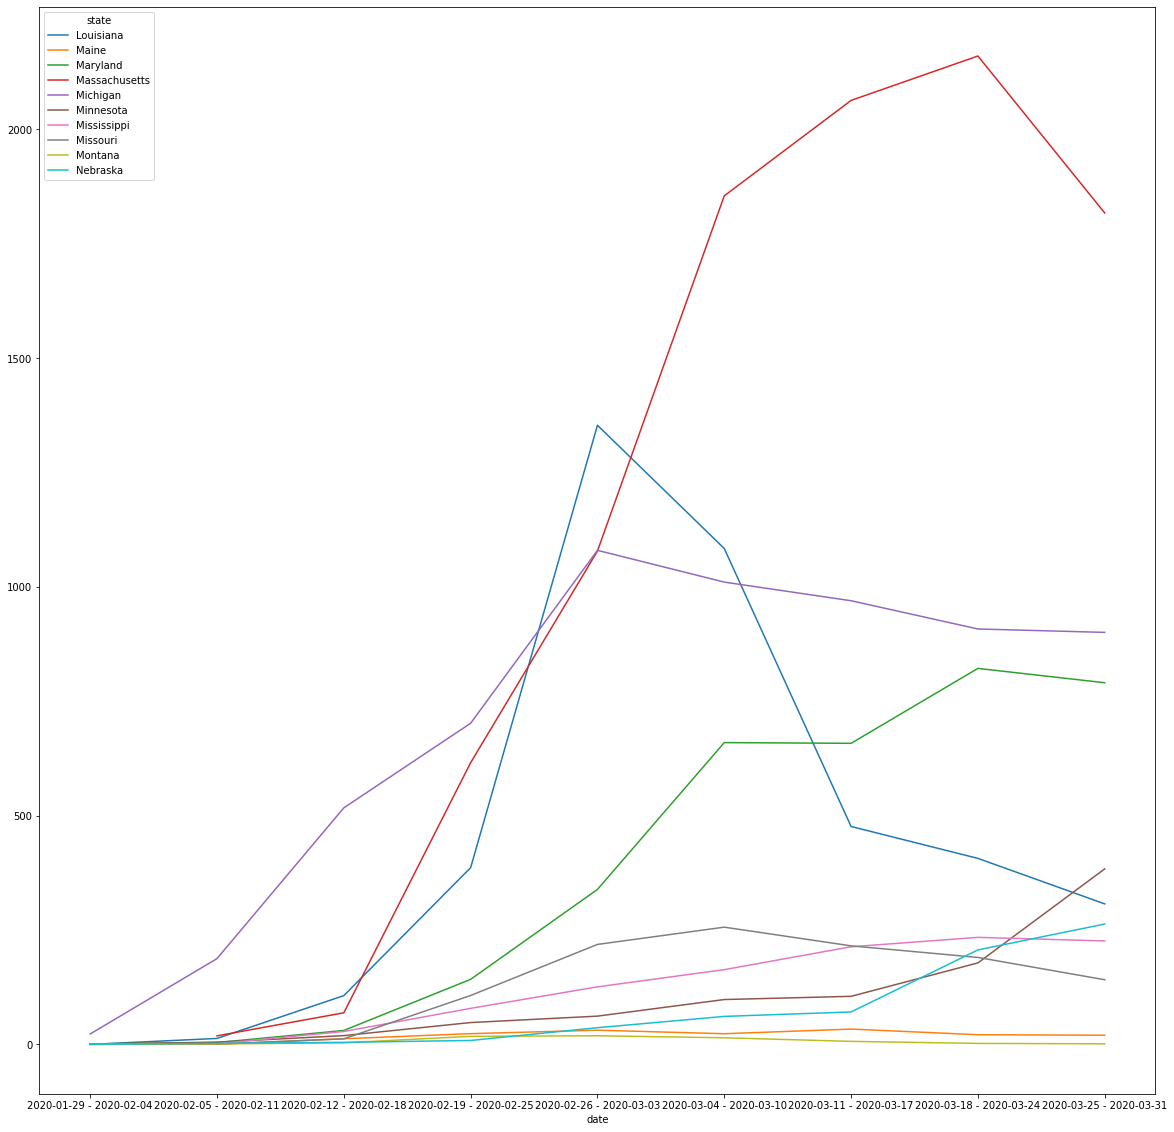

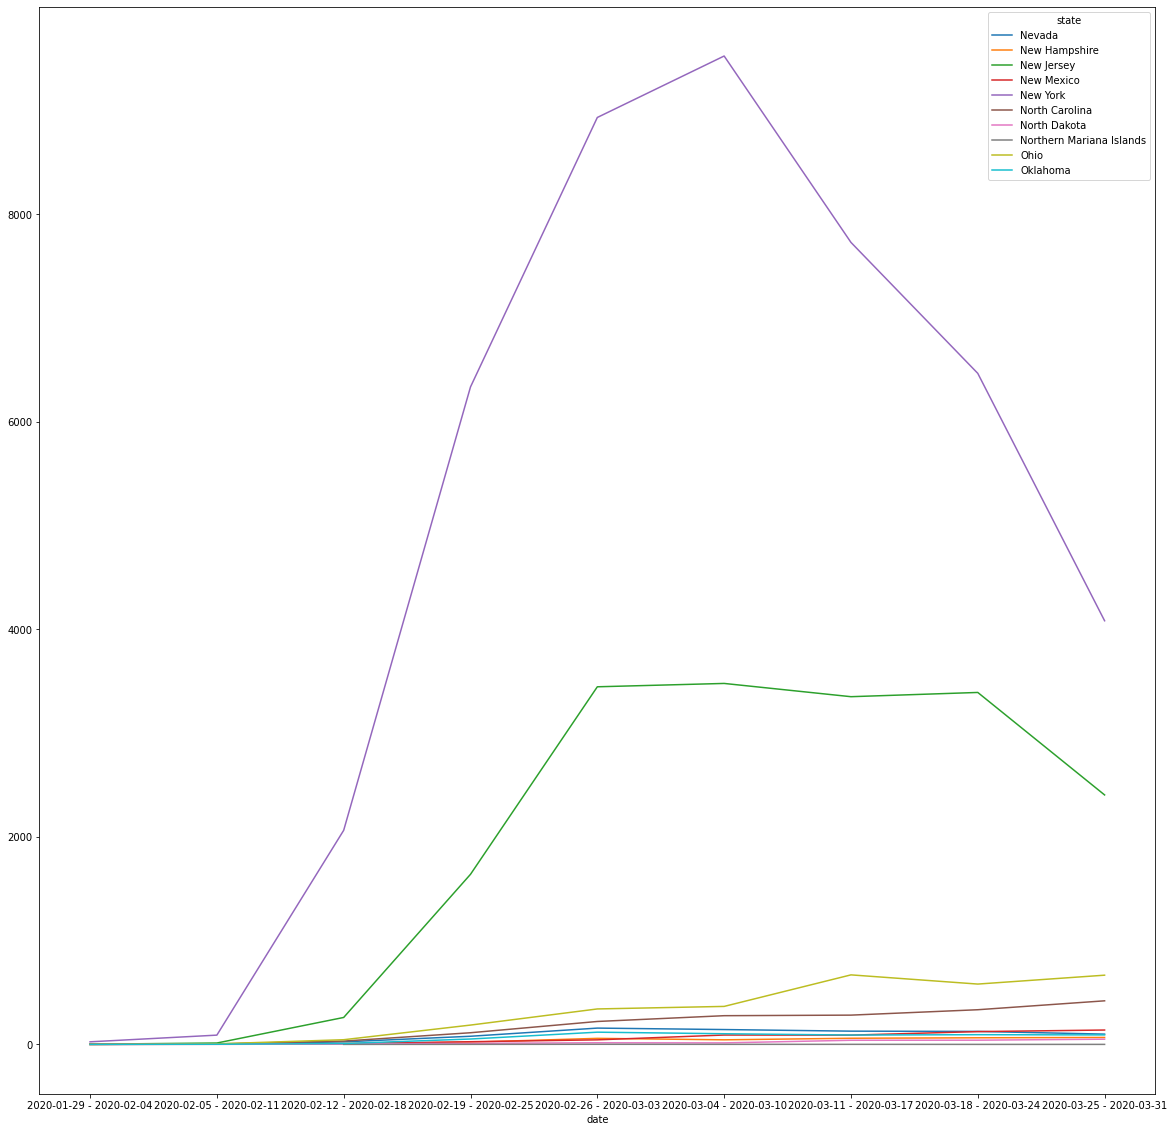

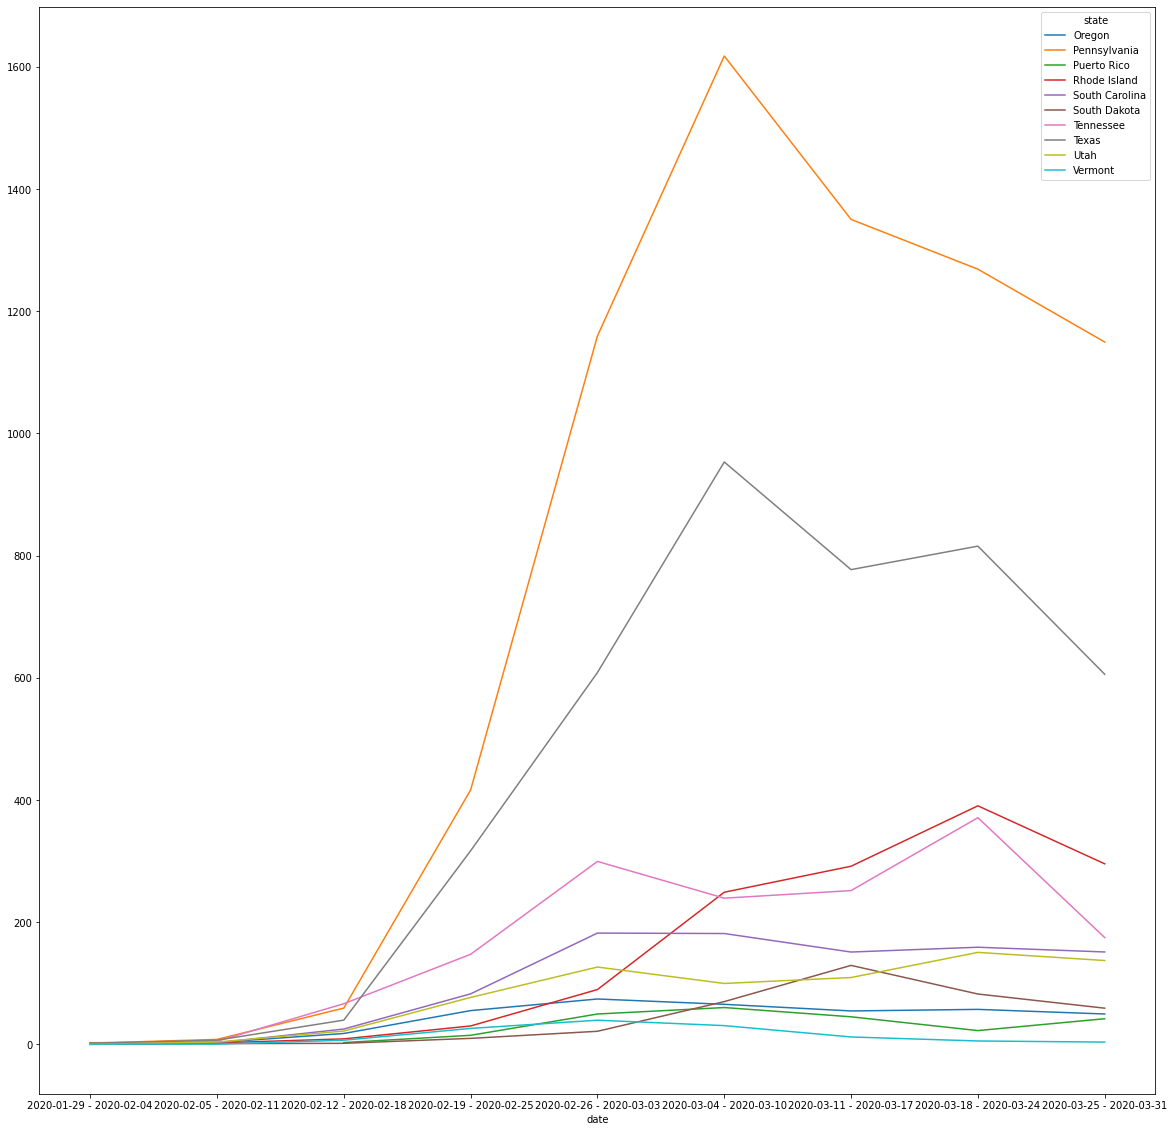

In [0]:
i = 0
while i < len(states):  
  state_q = (covid19_week_data.state==states[i]) + (covid19_week_data.state==states[i+1]) + (covid19_week_data.state==states[i+2])+ (covid19_week_data.state==states[i+3])+ (week_lolo.state==states[i+4])+ (covid19_week_data.state==states[i+5])+(covid19_week_data.state==states[i+6]) + (covid19_week_data.state==states[i+7]) + (covid19_week_data.state==states[i+8])+ (covid19_week_data.state==states[i+9])
  df = covid19_week_data[state_q].pivot(index='date', columns='state', values='positiveIncrease')
  print('-----------------')
  print([states[i], states[i+1], states[i+2],states[i+3],states[i+4],states[i+5],states[i+6],states[i+7],states[i+8],states[i+9]])
  plt_prog = df.plot(figsize=(20,20)) # figsize=(20,20)
  plt_prog.set_xticklabels(weeks_str)
  i += 10

[Text(0, 0, '2020-01-22 - 2020-01-28'),
 Text(0, 0, '2020-01-29 - 2020-02-04'),
 Text(0, 0, '2020-02-05 - 2020-02-11'),
 Text(0, 0, '2020-02-12 - 2020-02-18'),
 Text(0, 0, '2020-02-19 - 2020-02-25'),
 Text(0, 0, '2020-02-26 - 2020-03-03'),
 Text(0, 0, '2020-03-04 - 2020-03-10'),
 Text(0, 0, '2020-03-11 - 2020-03-17'),
 Text(0, 0, '2020-03-18 - 2020-03-24'),
 Text(0, 0, '2020-03-25 - 2020-03-31')]

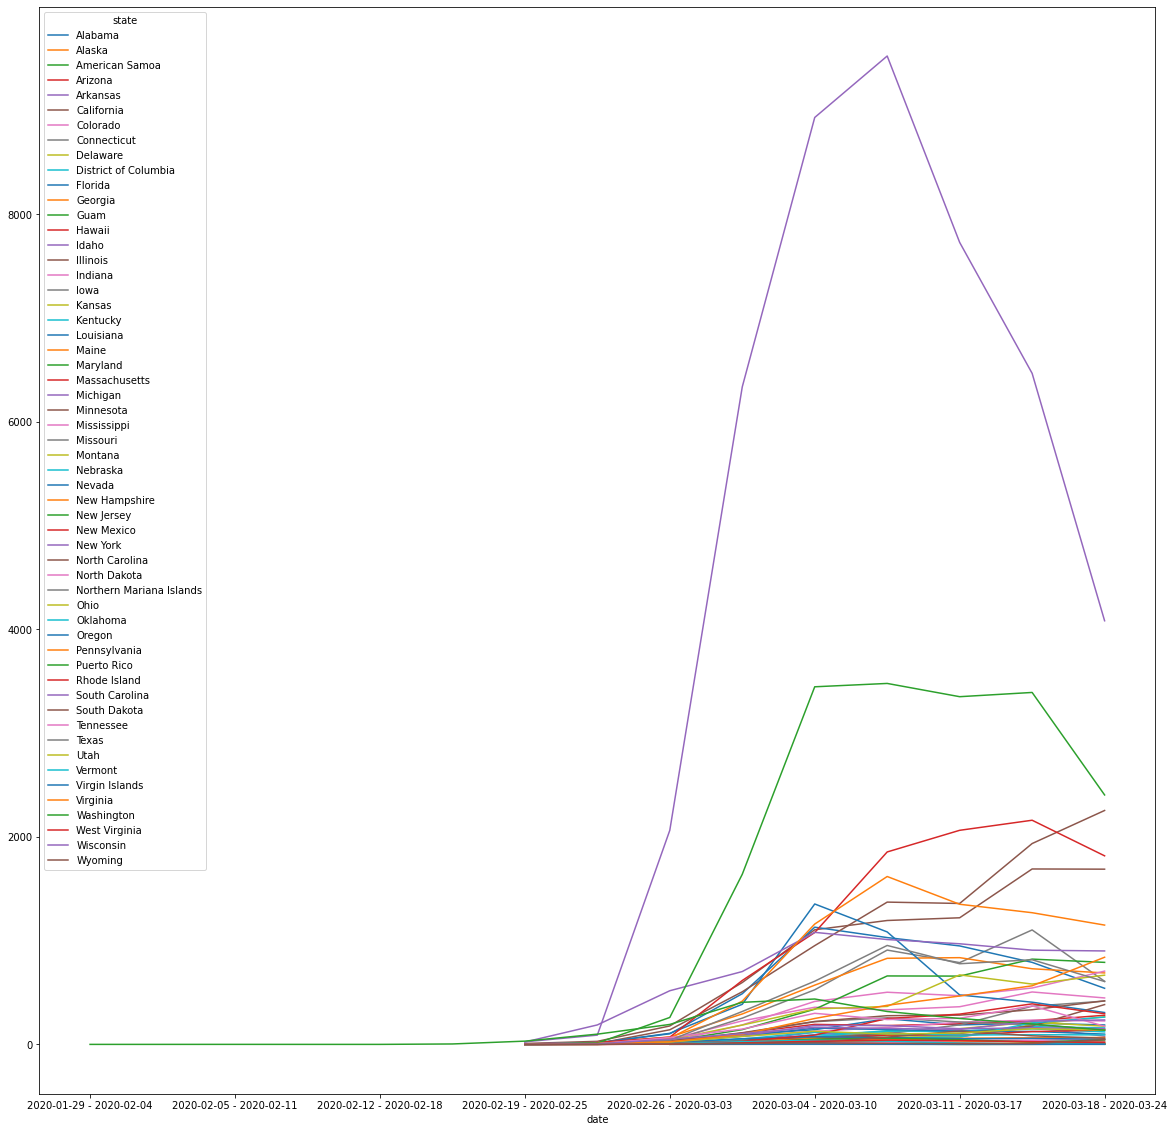

In [0]:
df = covid19_week_data.pivot(index='date', columns='state', values='positiveIncrease')
plt_prog = df.plot(figsize=(20,20))
plt_prog.set_xticklabels(weeks_str)


In [0]:
covid19_total = covid19_total.replace(states.keys(), states.values())
covid19_total['dateChecked'] = pd.to_datetime(covid19_total['dateChecked'])
covid19_total = covid19_total.rename(columns={"dateChecked": "date"}, errors="raise")

In [0]:
covid19_total.head()

,date,state,positive,negative,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered
0,2020-04-30 20:00:00+00:00,Alaska,355.0,18764.0,19.0,NaN,NaN,NaN,NaN,NaN,252.0
1,2020-04-30 20:00:00+00:00,Alabama,7019.0,80177.0,NaN,978.0,NaN,335.0,NaN,195.0,NaN
2,2020-04-30 20:00:00+00:00,Arkansas,3255.0,45124.0,95.0,402.0,NaN,NaN,23.0,85.0,1305.0
3,2020-04-30 20:00:00+00:00,American Samoa,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-30 20:00:00+00:00,Arizona,7648.0,64138.0,755.0,1169.0,311.0,NaN,194.0,NaN,1499.0


In [0]:
date = covid19_total.groupby(['state'])['date'].max()[0]
last_day = covid19_total[covid19_total.date == date]
last_day = last_day.dropna(axis=1)
last_day.head()

,date,state,positive,negative
0,2020-04-30 20:00:00+00:00,Alaska,355.0,18764.0
1,2020-04-30 20:00:00+00:00,Alabama,7019.0,80177.0
2,2020-04-30 20:00:00+00:00,Arkansas,3255.0,45124.0
3,2020-04-30 20:00:00+00:00,American Samoa,0.0,3.0
4,2020-04-30 20:00:00+00:00,Arizona,7648.0,64138.0


In [0]:
last_day[last_day.positive == 0]

,date,state,positive,negative
3,2020-04-30 20:00:00+00:00,American Samoa,0.0,3.0


Text(0.5, 1.0, 'What kind of developer are you?')

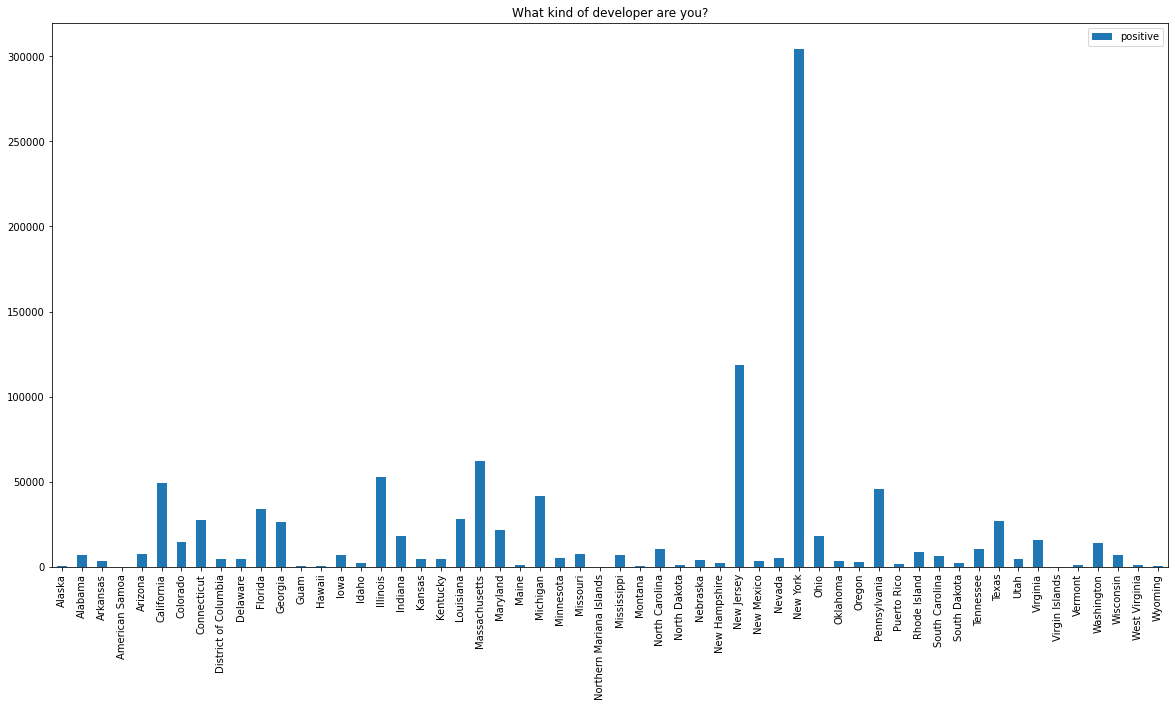

In [0]:
plot_data = last_day['positive'].to_frame()
# plot_data = plot_data.set_index(list(last_day['state']))
plot_1 = plot_data.plot(kind="bar", figsize=(20,10))
plot_1.set_xticklabels(list(last_day['state']))
plt.title("What kind of developer are you?")

In [0]:
covid19_df['date'] = covid19_df['date'].dt.weekofyear
mobility_df['date'] = mobility_df['date'].dt.weekofyear
# from week 4 to week 18

In [0]:
covid19_df.groupby(['state'])['date'].min()

state
Alabama                     10
Alaska                      10
American Samoa              12
Arizona                     10
Arkansas                    10
California                  10
Colorado                    10
Connecticut                 10
Delaware                    10
District of Columbia        10
Florida                     10
Georgia                     10
Guam                        12
Hawaii                      10
Idaho                       10
Illinois                    10
Indiana                     10
Iowa                        10
Kansas                      10
Kentucky                    10
Louisiana                   10
Maine                       10
Maryland                    10
Massachusetts               11
Michigan                     9
Minnesota                   10
Mississippi                 10
Missouri                    10
Montana                     10
Nebraska                    10
Nevada                      10
New Hampshire               10
Ne

In [0]:
covid19_total['date'] = covid19_total['date'].dt.weekofyear

In [0]:
total = covid19_total.dropna(axis=0)

In [0]:
mobility_df = mobility_df.drop(columns=['country_region_code','country_region','country_region_code', 'sub_region_2'])

In [0]:
mobility_df.head()

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
87589,NaN,7,6.0,2.0,15.0,3.0,2.0,-1.0
87590,NaN,7,7.0,1.0,16.0,2.0,0.0,-1.0
87591,NaN,8,6.0,0.0,28.0,-9.0,-24.0,5.0
87592,NaN,8,0.0,-1.0,6.0,1.0,0.0,1.0
87593,NaN,8,2.0,0.0,8.0,1.0,1.0,0.0


In [0]:
merged_data = pd.merge(mobility_df, covid19_df, on='date', how='inner')

In [0]:
merged_data.groupby(['sub_region_1', 'date']).sum()

retail_and_recreation_percent_change_from_baseline  ...  totalTestResultsIncrease
sub_region_1 date                                                      ...                          
Alabama      7                                                1533.0   ...                       0.0
             8                                               -1253.0   ...                       0.0
             9                                               49707.0   ...                   51121.0
             10                                             951698.0   ...                 1605520.0
             11                                            1242894.0   ...                16094673.0
...                                                              ...   ...                       ...
Wyoming      13                                           -2030560.0   ...                89675420.0
             14                                           -2093280.0   ...               136486202.0
             15                                            -850640.0   ...               145148538.0
             16                                            -772240.0   ...               144770418.0
             17                                            -607992.0   ...               210121991.0

[561 rows x 16 columns]